<a href="https://colab.research.google.com/github/JhonyMitis/Modelado_Simulacion/blob/master/Ejercicio1_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jhony Edison Mitis - 816037

###Universidad Nacional de Colombia


# Solución de Problemas de Valor Inicial

Encuentre una aproximación a $x_{(t)}$, dado:

$\dot x = f_{(t, x)}$


$x_{(t=0)} = x_0$

In [0]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [0]:
%matplotlib inline

## Método de Euler

Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h.

$x_{i+1} = x_{i} + hf_{(t_i, x_i)}$

In [0]:
def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x   

### Descripción del código del metodo de Euler
Se definió una función la cual contiene los siguientes argumentos:

*   **func:** Este parámetro corresponde al sistema que va hacer analizado, es decir al cual se le buscará una solución de acuerdo a su condición inicial.

*   **h:** Corresponde a la variación en el espacio del tiempo si es su caso, es decir es el diferencial que esta presente en la ecuación a analizar.

*   **tini:** Es el tiempo inicial y este determina el momento en cual se comenzará a realizar el análisis del problema
*   **tfin:** Es el tiempo final del análisis del sistema 
*   **x0:** Este parámetro es el valor inicial que se da como condición del sistema. Es muy importante pues permite obtener las soluciones particular al sistema, para así poder estudiar su comportamiento.
*   **Params:** Este argumento de la función es como su nombre lo dice permite parametrizar las caracteristicas de la gráfica, puede ser en algunos casos su amplitud u otro tipo de información que se tenga.

En el código se incluye uno tipo de datos en específico las listas $x$ y $t$, en las cuales se guardará la información obtenida, para poder así graficar o analizar estos datos.

A continuación está un ciclo el cual tiene una duración entre los valores de $tini$ y $tfin$, en este ciclo se realiza el proceso de desarrollo del método numérico que se está trabajando.

El método $append$ permite agregar los valores correspondientes a $x$ y $t$ que se vayan generando a las listas anteriormente creadas.

Las lineas de código que se muestran a continuación correponden al proceso de numérico como tal, es decir en estas se realiza tanto un incremento en el tiempo como en le espacio, dadas las particualridades de solución que plantea el método. $xi = xi + h*func(ti,xi,params)$ esta linea de código es la que recolecta los datos que se incrementan para luego poder mostrar la gráfica.

por otro lado la linea $ti = ti + h$ incrementa de manera diferencial el tiempo con el cual se trabajará.

Por último la función devuelve los datos que logró almacenar tanto de $x$ como de $t$ los cuales como se ha dicho servirán para su posterior gráfica.




##Método de Runge-Kutta de Cuarto Orden
Es un método iterativo para la aproximación de soluciones de ecuaciones diferenciales ordinarias.

$k_1 = f_{(t_i, x_i)}$

$k_2 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})}$

$k_3 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})}$

$k_4 = f_{(t_i + h, x_i + k_3)}$


$x_{i+1} = x_i + \frac{h}{6}(k_1 + k_2 + k_3 + k_4)$

In [0]:
def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## Descripción del método Runge-Kutta de cuarto orden

Este código tiene los mismos parámetros del método de Euler y su funcionamiento es el mismo, lo que varía es la menra de calcular los $x$ y $t$ de acuerdo a la metodología prpopuesta por este método. En si se se trata de hallar constantes que permitan describir de manera aproximada correctamente el comportamiento la función en estudio. Y esto se puede lograr pues cada cambio que se haga será tenido en cuenta en el siguiente paso, que tiene un modelo igual al anterior.

$k1 = func( ti,xi,params)$

$k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )$

Al final se suma todos estos cambios para así llegar a un valor de $x$
$xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6$

El tiempo en este modelo funciona de igual manera que en el otro método

# Comparación de métodos  

Dada la ecuación diferencial no lineal:

$\dot x = a\sin x$

Siendo $a \in \Re$ una constante cualquiera. Grafique la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método RK4.

Varíe el paso de integración $h$ a fin de observar cómo varía la precisión de los resultados numéricos a medida que éste se hace más pequeño.

In [0]:
def mi_sistema1(t, x, a):
    x_dot = a*np.sin(x)
    return x_dot


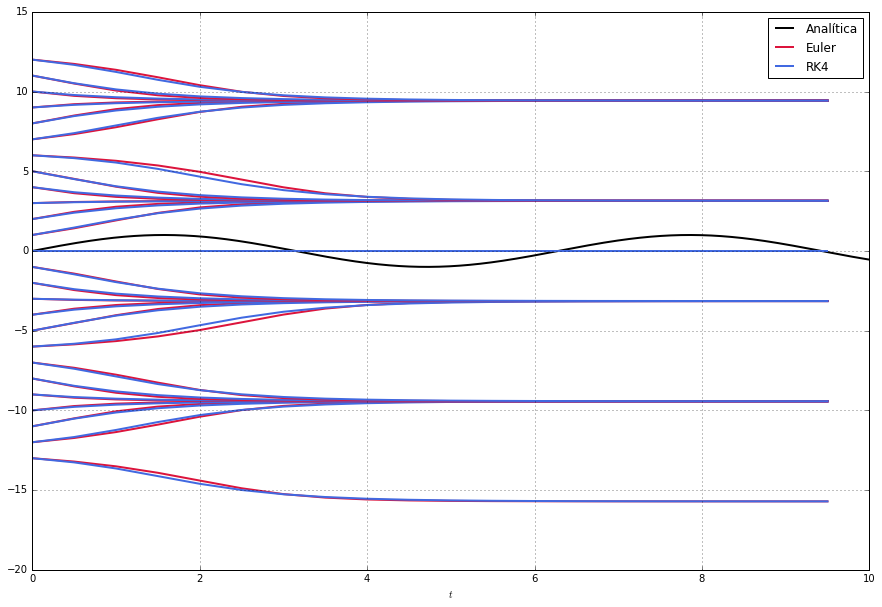

In [0]:
a = 1
h = 0.5
tini = 0
tfin = 10
x0 = 0.8

plt.figure(figsize=(15,10))
##Solución analítica 
t = np.linspace(0,10,1001) 
x = a*np.sin(t)
plt.plot(  t, x, 'black', label = 'Analítica', linewidth = 2)

##Metodo de Euler y método de Runge-Kutta
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( mi_sistema1, h, tini, tfin, x0, a )
    t2,x2 = rk4( mi_sistema1, h, tini, tfin, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

#Velocidad Terminal

El movimiento de algunos cuerpos han sido modelados con ecuaciones que describen correctamente su comportamiento, pero en algunos casos hallar la solución a estos se convierte en un arduo trabajo, por lo cual se utlizan metosdos numércios para aproximar su solución, esto se logra variando algunos parametros o constantes, que de cierta manera define su comportamiento.

La existe un tipo de movimiento conocido coo caída libre, el cual solo tiene en cuenta factores como tiempo y el espacio, pero si a eso se añade un tercer factor como puede ser la resistencia que ofrece un medio a que otro lo atravese cambia totalmente su comportamiento. Un ejemplo de estos es la caída que tiene un  paracidista, pues el aire ofrece cierto tipo de resistencia a este movimiento. 

La velocidad $v(t)$ de un paracidista cayendo al suelo esta definida mediante la siguiente ecuación.

$m\dot{v} = mg-kv^{2}$ 

Donde $m$ es la masa del paracaidista, $g$ la aceleración debida a la gravedad y $k>0$  es una constante relacionada a la cantidad de resistencia al aire.

Se pretende observar como es la solución a la ecuación que determina este movimiento mediante al uso de dos métodos numéricos y el analítico.

##Solución análitica
Haciendo un anláisis del movimiento se puede decir que que la velocidad en un momento va crcer rapido hasta establecerse en un valor fijo por lo tanto la acelarción será igual a cero, por lo tanto se tiene que.

$a=\dot{v}=0$

$0 = -mg-kv^{2}$

$v_{lim}=\sqrt[]{\frac{mg}{k}}$

 Se tiene siguiente la ecuación diferencial para hallar $v(t)$.

 $\frac{mdv}{dt} = (mg-kv^{2})$

 Se procede a encontrar el cojunto de soluciones general a la ecuación diferencial, utilizando el método de separación de varibales.


${mdv} = (mg-kv^{2})dt$

$\frac{dv}{mg-kv^{2}} = \frac{k}{m}dt$

Integrando esto se tiene que:

$\frac{1}{\sqrt[]{\frac{mg}{k}}}\tanh^{-1}(\frac{v}{\sqrt[]{\frac{mg}{k}}})=\frac{k}{m}t+c$

Despejando la ecuación se tiene:

$v(t)=\sqrt[]{\frac{mg}{k}}\tanh(c+\sqrt[]{\frac{kg}{m}t})$

Tomando como condición inicial $v(0)=0$, la solución particular de la ecuación diferencial será:

$0= \tanh(c+\sqrt[]{\frac{kg}{m}0})$

$c=0$

Por lo tanto la solución prticular será.

$\$v(t)=\sqrt[]{\frac{mg}{k}}\tanh(\sqrt[]{\frac{kg}{m}t})$$







###Solución por métodos numéricos 

In [0]:
def mi_sistema2(t, x, a):
    v_dot = 9.8-a/70*x**2
    return v_dot

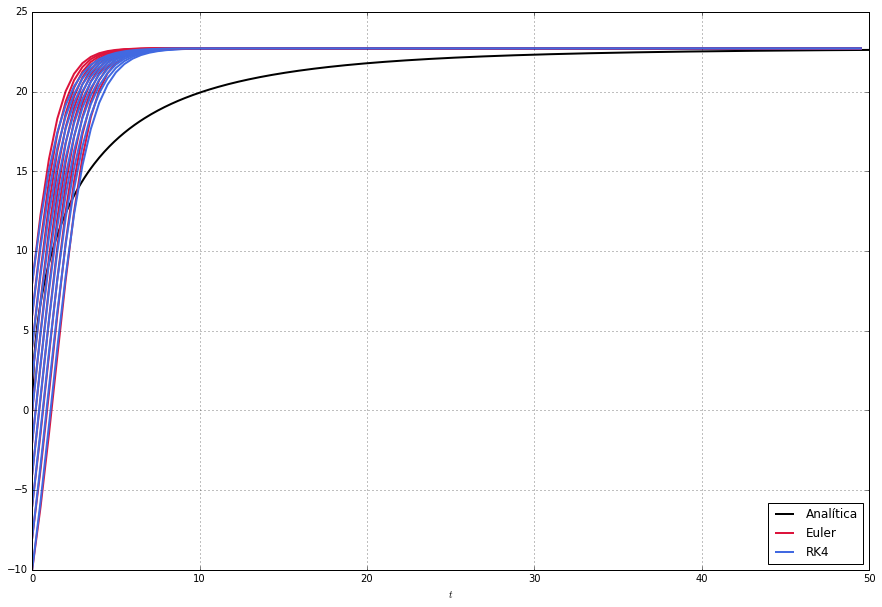

In [0]:
##Solución analítica, Metodo de Euler y Método de Runge-Kutta de Cuarto Orden 

a = 1.33
h = 0.5
tini = 0
fin = 50
x0 = 0
m= 70
g=9.8

plt.figure(figsize=(15,10))
##Solución analítica
t = np.linspace(0,100,1000) 
x = np.sqrt(m*g/a)*(np.tanh(np.sqrt(a*g*t/m)))
plt.plot(t, x, 'black', label = 'Analítica', linewidth = 2)
'''
##Solución por método de Euler
t1,x1 = euler( mi_sistema2, h, tini, tfin, x0, a )
plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)

##Solución por método de Runge-Kutta de cuarto orden
t2,x2 = rk4( mi_sistema2, h, tini, tfin, x0, a )
plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
'''
for i in range(-10,10,2):
    x0=i
    t1,x1 = euler( mi_sistema2, h, tini, tfin, x0, a )
    t2,x2 = rk4( mi_sistema2, h, tini, tfin, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2 )
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)

plt.xlim([tini, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()
